In [2]:
from sqlalchemy import create_engine
import pandas as pd

USERNAME = "akosschneider"
PASSWORD = "DMT2025!"
HOST = "dtim.essi.upc.edu"        
PORT = "5432"                          
DBNAME = "dbakosschneider"           

# Connessione al database
engine = create_engine(f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

# Test di connessione: mostra prime righe della tabella dim_year
df = pd.read_sql("SELECT * FROM dim_year LIMIT 5;", engine)
df


,year
0,2019
1,2020
2,2021


In [8]:
df_structure = pd.read_sql("SELECT * FROM fact_population_income LIMIT 5;", engine)
df_structure.columns


Index(['census_tract_id', 'year', 'population', 'income_euros',
       'income_normalized'],
      dtype='object')

In [9]:
pd.read_sql("SELECT * FROM dim_location LIMIT 5;", engine).columns


Index(['census_tract_id', 'census_tract_area', 'neighbourhood_code',
       'neighbourhood_name', 'district_code', 'district_name', 'geometry'],
      dtype='object')

In [10]:
query_districts = """
SELECT 
    l.district_name AS district,
    AVG(f.population) AS avg_population,
    AVG(f.income_euros) AS avg_income
FROM fact_population_income f
JOIN dim_location l ON f.census_tract_id = l.census_tract_id
GROUP BY l.district_name
ORDER BY l.district_name;
"""

df_districts = pd.read_sql(query_districts, engine)
df_districts


,district,avg_population,avg_income
0,Ciutat Vella,1997.858025,15060.899074
1,Eixample,1559.333333,24479.882697
2,Gràcia,1418.344828,23743.224215
3,Horta-Guinardó,1411.403794,19321.953604
4,Les Corts,1443.286550,28405.462982
5,Nou Barris,1478.216524,15660.170598
6,Sant Andreu,1592.817544,19268.186386
7,Sant Martí,1638.829932,19622.999637
8,Sants-Montjuïc,1595.789174,18739.197293
9,Sarrià-Sant Gervasi,1533.346939,34336.495952


In [6]:
query_grouped = """
SELECT 
    l.district_name AS district,
    f.year,
    AVG(f.population) AS avg_population,
    AVG(f.income_euros) AS avg_income
FROM fact_population_income f
JOIN dim_location l ON f.census_tract_id = l.census_tract_id
GROUP BY l.district_name, f.year
ORDER BY l.district_name, f.year;
"""

df_grouped = pd.read_sql(query_grouped, engine)
df_grouped


,district,year,avg_population,avg_income
0,Ciutat Vella,2019,1958.018519,15741.409259
1,Ciutat Vella,2020,2004.592593,14053.976481
2,Ciutat Vella,2021,2030.962963,15387.311481
3,Eixample,2019,1555.913295,25446.193237
4,Eixample,2020,1565.156069,23531.475780
5,Eixample,2021,1556.930636,24461.979075
6,Gràcia,2019,1414.482759,24445.190920
7,Gràcia,2020,1423.586207,22859.892874
8,Gràcia,2021,1416.965517,23924.588851
9,Horta-Guinardó,2019,1400.536585,19710.457480


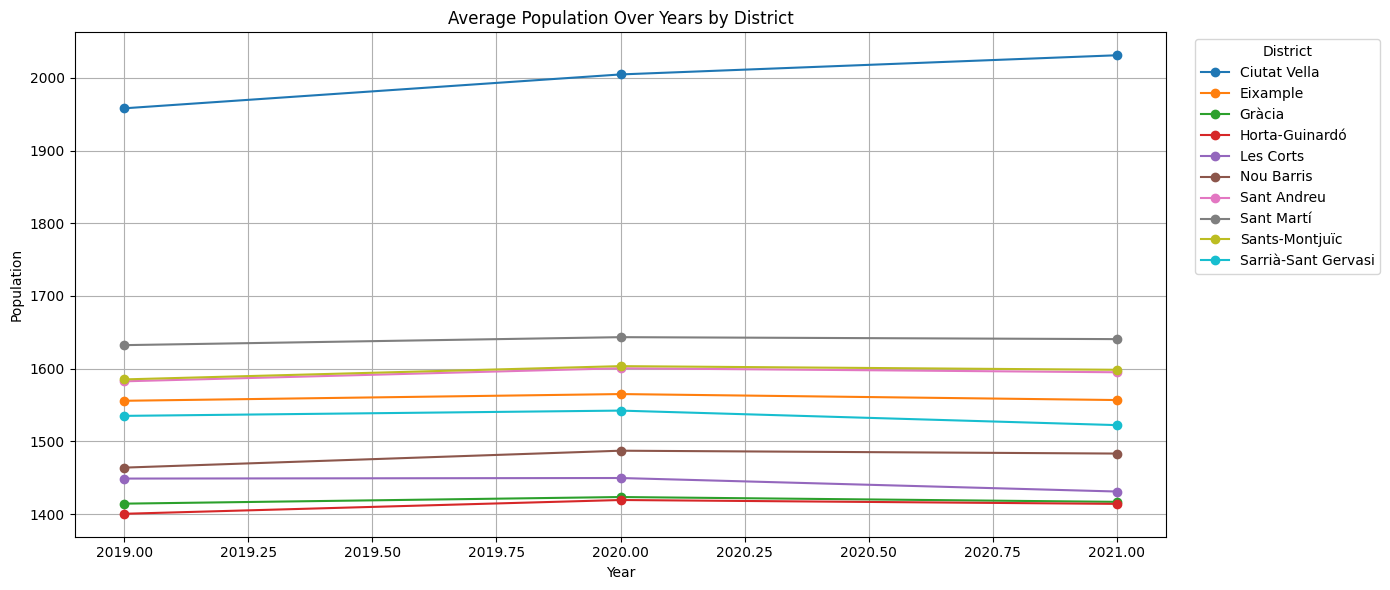

In [11]:
import matplotlib.pyplot as plt

# Pivot dei dati: righe = anno, colonne = distretti, valori = popolazione
pop_pivot = df_grouped.pivot(index='year', columns='district', values='avg_population')

# Grafico a linee
pop_pivot.plot(figsize=(14, 6), marker='o')
plt.title("Average Population Over Years by District")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.legend(title='District', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


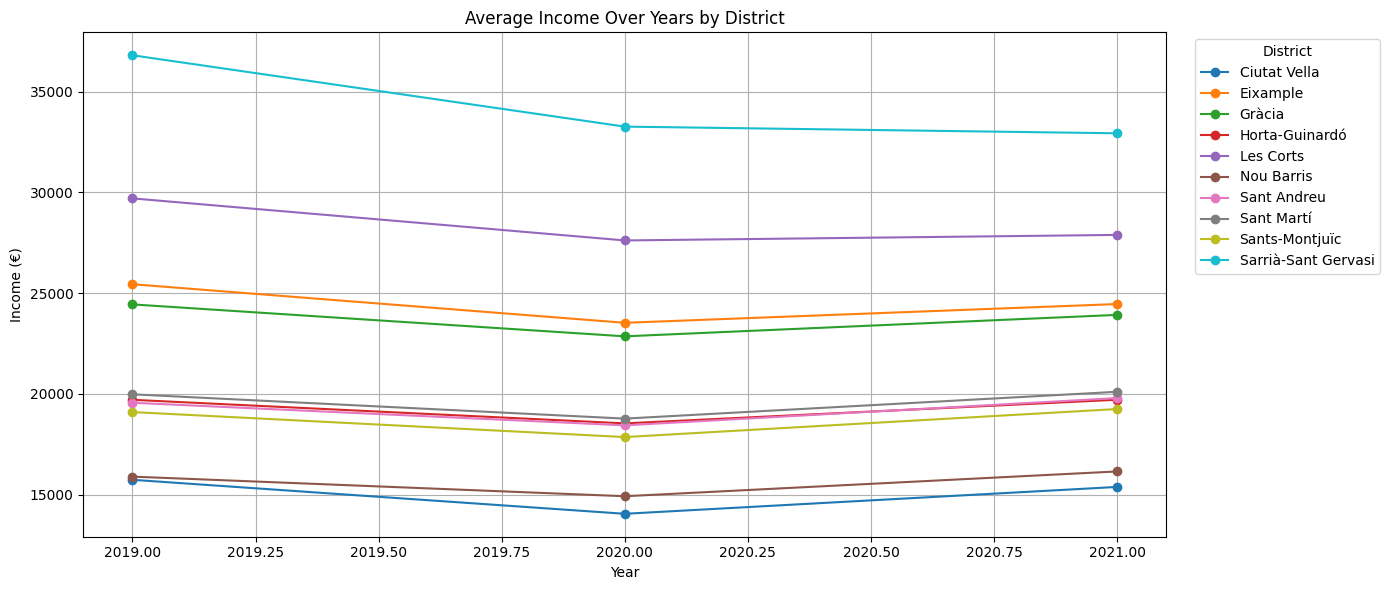

In [12]:
# Pivot dei dati: righe = anno, colonne = distretti, valori = reddito
income_pivot = df_grouped.pivot(index='year', columns='district', values='avg_income')

income_pivot.plot(figsize=(14, 6), marker='o')
plt.title("Average Income Over Years by District")
plt.xlabel("Year")
plt.ylabel("Income (€)")
plt.grid(True)
plt.legend(title='District', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


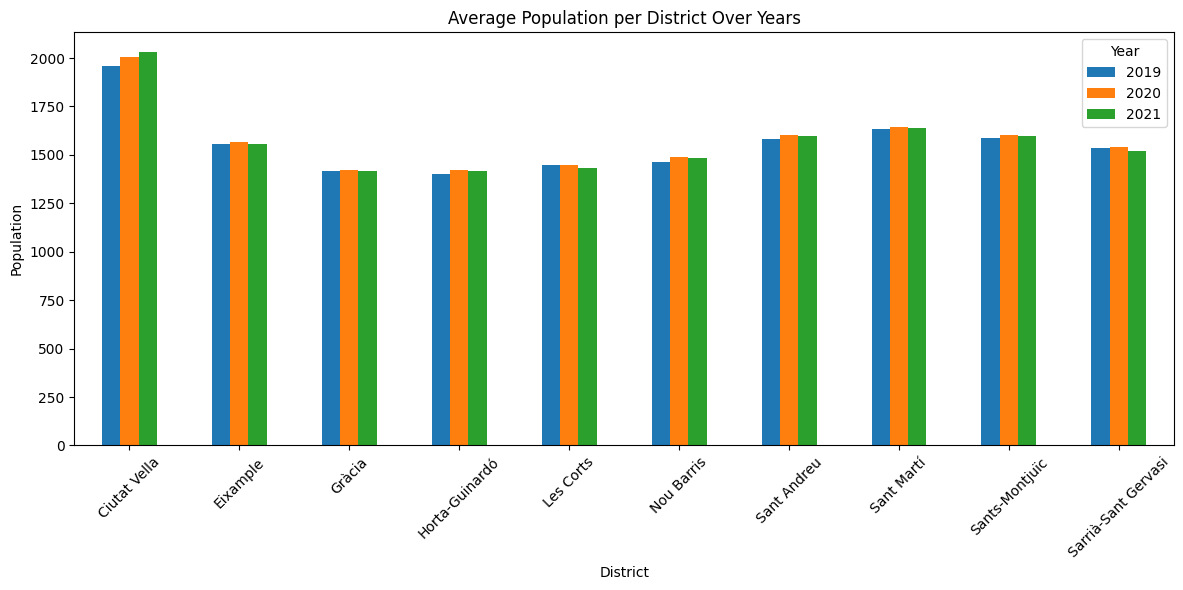

In [13]:
# Pivot dei dati: righe = distretti, colonne = anni, valori = popolazione
df_pivot_pop = df_grouped.pivot(index='district', columns='year', values='avg_population')

# Crea grafico a barre raggruppate
df_pivot_pop.plot(kind='bar', figsize=(12, 6))
plt.title("Average Population per District Over Years")
plt.ylabel("Population")
plt.xlabel("District")
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


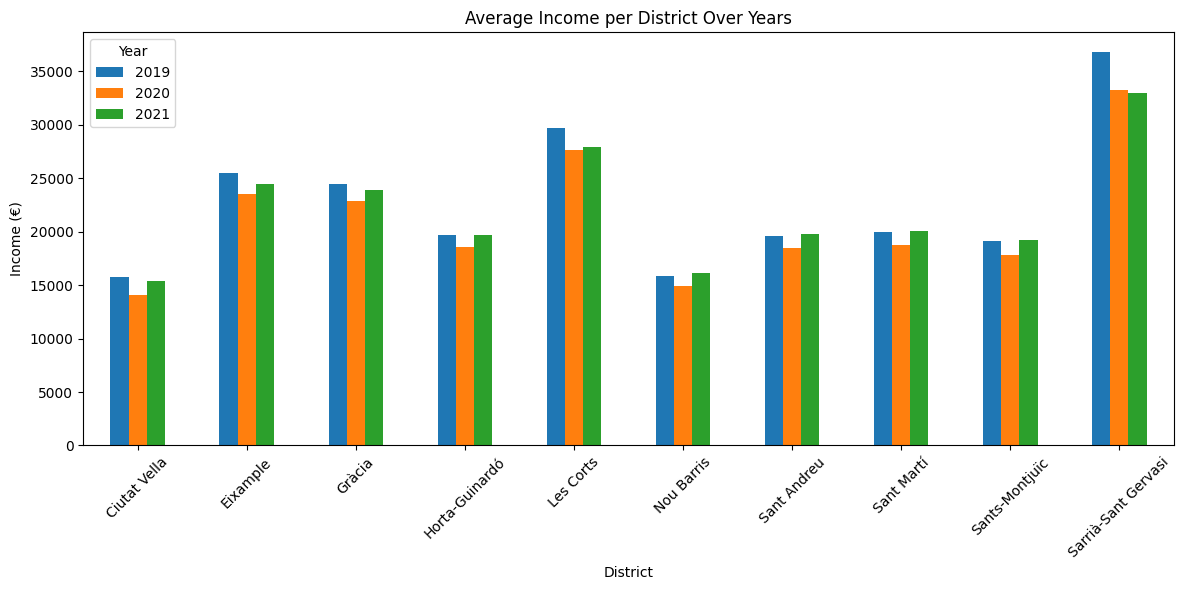

In [14]:
df_pivot_inc = df_grouped.pivot(index='district', columns='year', values='avg_income')

df_pivot_inc.plot(kind='bar', figsize=(12, 6))
plt.title("Average Income per District Over Years")
plt.ylabel("Income (€)")
plt.xlabel("District")
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


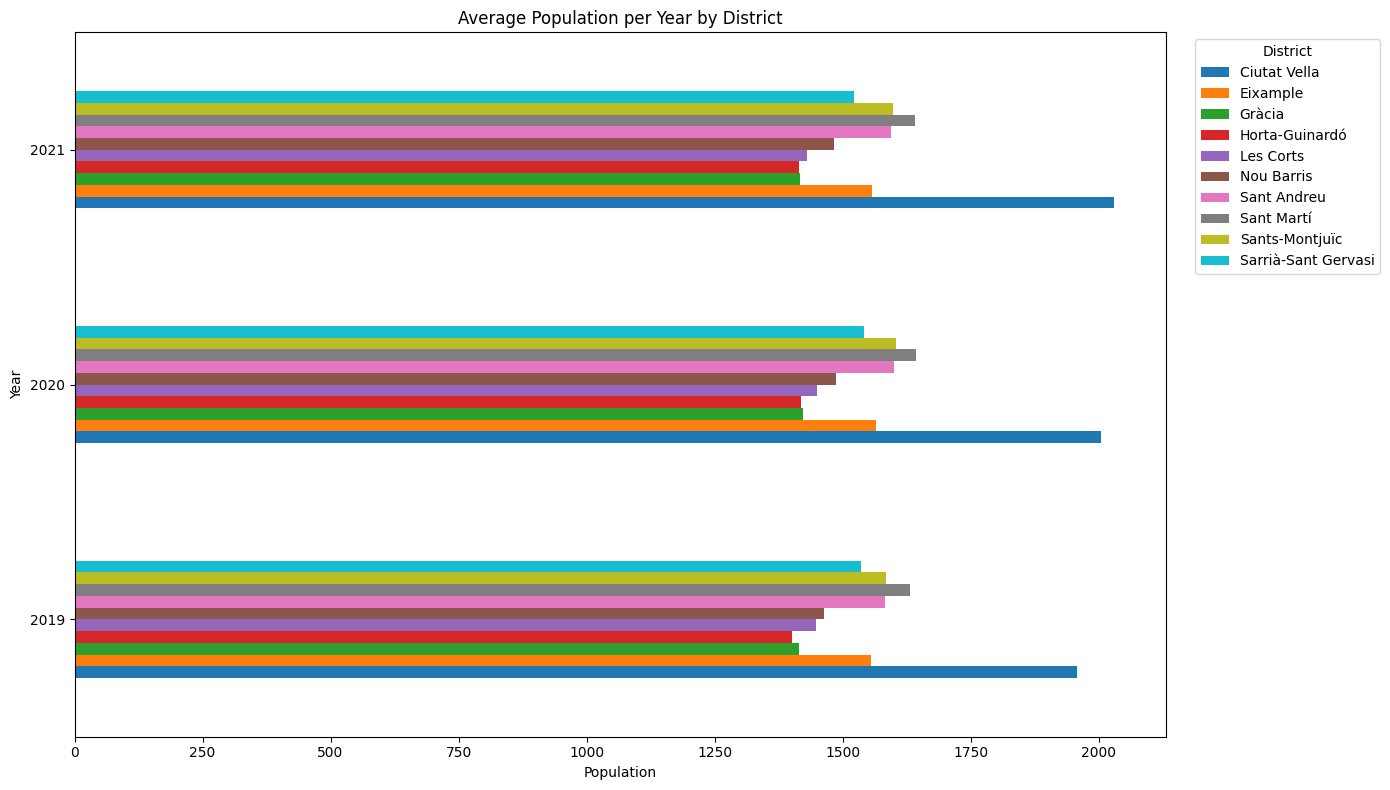

In [17]:
# Pivot: righe = anni, colonne = distretti, valori = popolazione
df_population_pivot = df_grouped.pivot(index='year', columns='district', values='avg_population')

# Ordina per anno (opzionale ma utile se i dati non sono già ordinati)
df_population_pivot = df_population_pivot.sort_index()

# Crea grafico a barre orizzontali
df_population_pivot.plot(kind='barh', figsize=(14, 8))

plt.title("Average Population per Year by District")
plt.xlabel("Population")
plt.ylabel("Year")
plt.legend(title="District", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


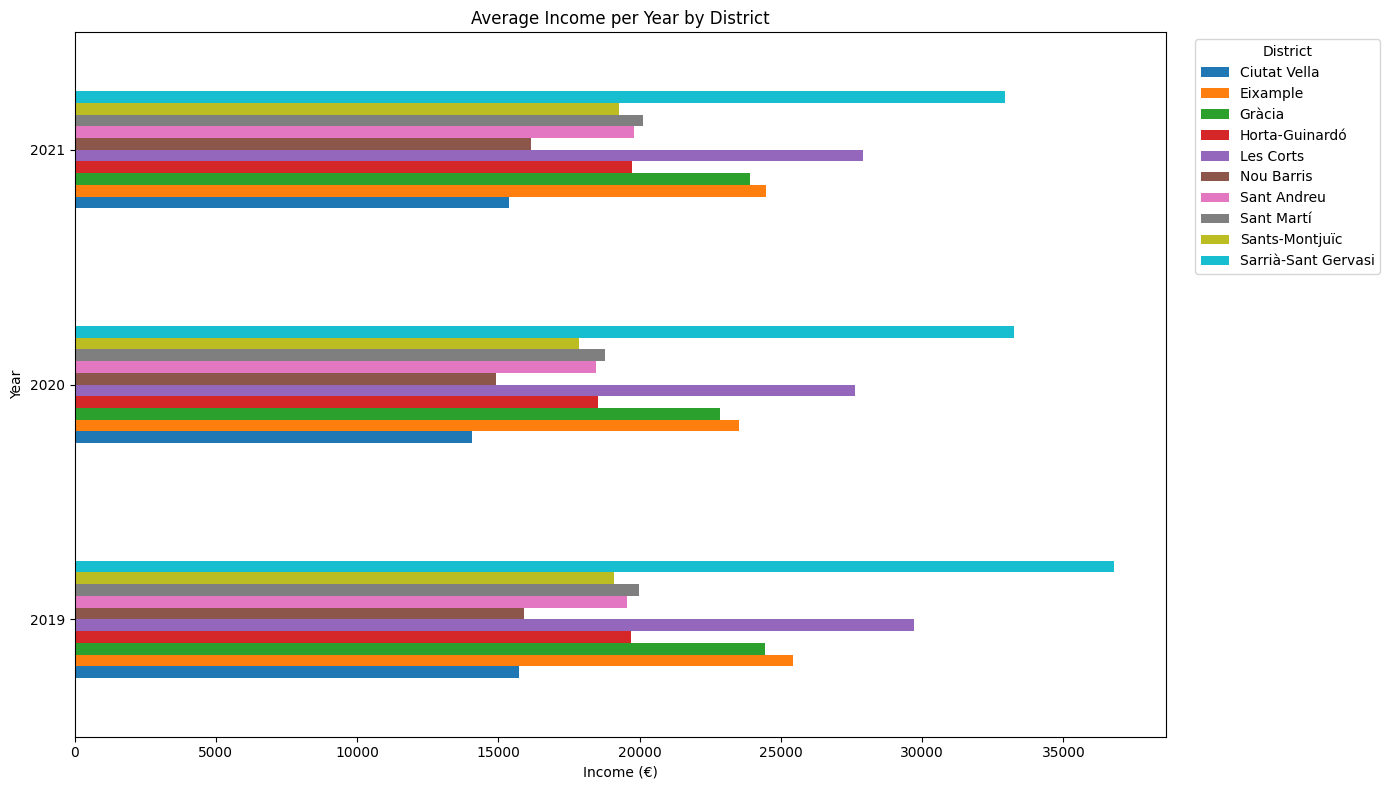

In [18]:
# Pivot: righe = anni, colonne = distretti, valori = reddito
df_income_pivot = df_grouped.pivot(index='year', columns='district', values='avg_income')

# Ordina per anno (utile per chiarezza visiva)
df_income_pivot = df_income_pivot.sort_index()

# Grafico a barre orizzontali
df_income_pivot.plot(kind='barh', figsize=(14, 8))

plt.title("Average Income per Year by District")
plt.xlabel("Income (€)")
plt.ylabel("Year")
plt.legend(title="District", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
